# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     2.981433e+01     6.488216e+00
 * time: 0.005383968353271484
     1     2.745941e+01     4.282380e+00
 * time: 0.025233983993530273
     2     1.857223e+01     4.198159e+00
 * time: 0.0495760440826416
     3     1.218236e+01     2.478825e+00
 * time: 0.07451081275939941
     4     1.131205e+01     2.417163e+00
 * time: 0.09453201293945312
     5     1.036513e+01     1.867010e+00
 * time: 0.11418890953063965
     6     9.754882e+00     1.282049e+00
 * time: 0.13396000862121582
     7     9.350596e+00     1.119546e+00
 * time: 0.15361881256103516
     8     8.898458e+00     8.350525e-01
 * time: 0.17322397232055664
     9     8.539937e+00     5.662512e-01
 * time: 0.26131200790405273
    10     8.396090e+00     5.835428e-01
 * time: 0.280681848526001
    11     8.297393e+00     4.177527e-01
 * time: 0.2997579574584961
    12     8.271305e+00     8.020314e-01
 * time: 0.314133882522583
    13     8.160578e+00     5.930331e-01
 * time: 0.3

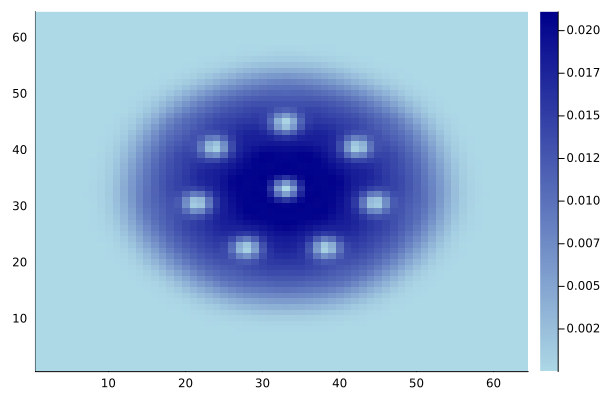

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)